In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'MU'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2008-1-1')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,MU
Date,
2019-04-17,0.009079
2019-04-18,0.005777
2019-04-22,0.000000
2019-04-23,-0.014623
2019-04-24,0.006061


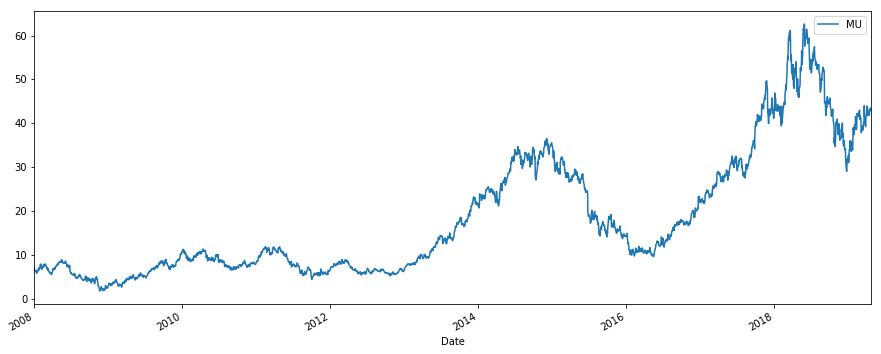

In [5]:
data.plot(figsize = (15,6))
plt.show()

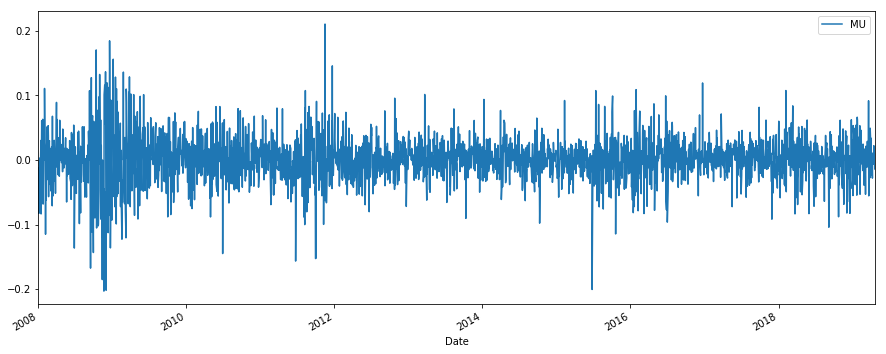

In [6]:
log_returns.plot(figsize = (15,6))
plt.show()

In [7]:
u = log_returns.mean()
u

MU    0.000636
dtype: float64

In [8]:
var = log_returns.var()
var

MU    0.001253
dtype: float64

In [9]:
drift = u - (.5 * var)
drift

MU    0.00001
dtype: float64

In [10]:
stdev = log_returns.std()
stdev

MU    0.035394
dtype: float64

In [11]:
drift.values

array([9.69733893e-06])

In [12]:
stdev.values

array([0.03539448])

In [13]:
norm.ppf(.95)

1.6448536269514722

In [14]:
x = np.random.rand(10,2)
x

array([[0.76347272, 0.69336707],
       [0.436798  , 0.51250088],
       [0.63772218, 0.11680196],
       [0.27019111, 0.95021076],
       [0.68558716, 0.48485266],
       [0.61022842, 0.51954403],
       [0.64511994, 0.93866761],
       [0.43574376, 0.64981856],
       [0.23284983, 0.61183027],
       [0.19528125, 0.58260192]])

In [15]:
norm.ppf(x)

array([[ 0.71751797,  0.50541718],
       [-0.15909249,  0.03134018],
       [ 0.35237687, -1.19112654],
       [-0.61223511,  1.6469006 ],
       [ 0.48338036, -0.03797788],
       [ 0.27991443,  0.04900922],
       [ 0.37217827,  1.54368454],
       [-0.16176931,  0.38483066],
       [-0.72949379,  0.28409253],
       [-0.85859772,  0.20855434]])

In [16]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.29586683, -0.18460705],
       [ 0.75534376,  0.89288958],
       [ 1.36701865,  0.11335816],
       [ 0.79668999, -0.30713731],
       [-0.95550881, -0.40527086],
       [ 0.50263091,  0.32658783],
       [-0.77495822, -0.52478161],
       [ 0.40430552,  0.58859186],
       [-1.34595065, -0.66651335],
       [ 0.85864765,  2.29738099]])

In [17]:
t_intervals = 250
iterations = 1000

In [18]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [19]:
daily_returns

array([[0.97648534, 1.02525096, 1.01182732, ..., 1.00951397, 0.9785803 ,
        1.00514311],
       [0.99490483, 0.94563576, 1.02433976, ..., 0.98241151, 1.04814655,
        1.05880065],
       [1.07554746, 0.96729982, 0.96119681, ..., 1.02387986, 0.99987996,
        1.00521432],
       ...,
       [1.03922924, 0.97488393, 1.00174281, ..., 1.07974709, 1.01845371,
        1.02767118],
       [0.95192857, 0.95883125, 1.02741575, ..., 0.97937438, 0.99483886,
        0.9566676 ],
       [0.95193503, 1.00954617, 1.01492453, ..., 0.98842998, 1.06703706,
        1.0214389 ]])

In [20]:
S0 = data.iloc[-1]
S0

MU    43.029999
Name: 2019-04-24 00:00:00, dtype: float64

In [21]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
price_list[0] = S0
price_list

array([[43.02999878, 43.02999878, 43.02999878, ..., 43.02999878,
        43.02999878, 43.02999878],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [24]:
price_list

array([[43.02999878, 43.02999878, 43.02999878, ..., 43.02999878,
        43.02999878, 43.02999878],
       [42.81075375, 40.69070554, 44.07733873, ..., 42.2731661 ,
        45.10174497, 45.56019088],
       [46.04499729, 39.36011218, 42.36699731, ..., 43.28264328,
        45.09633081, 45.79775651],
       ...,
       [38.14455229, 58.78946797, 63.43862471, ..., 40.56718973,
        35.05105098, 86.84241045],
       [36.31088896, 56.36917889, 65.1778424 , ..., 39.73046626,
        34.87014766, 83.07932014],
       [34.56560725, 56.90728885, 66.15059105, ..., 39.27078414,
        37.20773988, 84.86044904]])

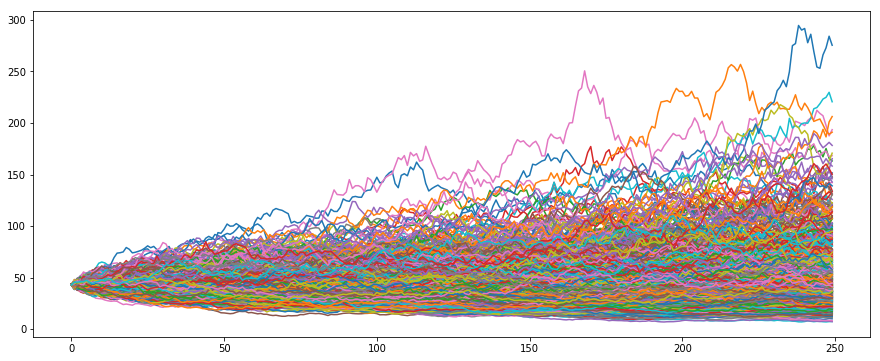

In [25]:
plt.figure(figsize = (15,6))
plt.plot(price_list)
plt.show()

In [26]:
price_list[-1]

array([ 34.56560725,  56.90728885,  66.15059105,  51.28349524,
        21.14240549,  32.43523167,  88.93223684,  72.90432682,
        22.16006036,  36.21978135, 101.37027396,  61.18562076,
        22.62516765,  70.21137814,  35.95262382, 122.71139037,
        33.95996358,  71.0238038 ,  19.82971876,  53.56223973,
        63.0320033 ,  99.9423028 ,  26.63310237,  37.17387318,
        71.99755901,  27.2116905 , 142.20932435,  56.04992283,
        48.33248156,  29.73869744,  67.13127689,  31.55243669,
        33.37012253,  46.97971402,  62.35977752,  54.62591023,
        77.78963815,  21.49727027,  61.40364883,  45.4224726 ,
        27.55151558,  30.10227991,  30.28388312,  90.21614118,
        76.05328405,  75.8883959 ,  43.36165083,  23.07248655,
        52.9627356 ,  29.22865816,  77.17883375,  20.16292508,
        26.24307501,  70.14772609,  51.38474465,  45.26763988,
        77.144129  ,  63.39566315,  42.39887537,  25.47314363,
        37.65972056, 110.29591864,  35.27544744,  73.53

In [27]:
np.mean(price_list[-1])

49.21894597173987